# EV Market Segmentation analysis (behavioural dataset (income basis))

# 📦 Importing Libraries
Let's load all the essential Python libraries for data manipulation, visualization, and dimensionality reduction.
These tools will help us explore the data, visualize patterns, and apply PCA to reduce dimensionality.

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.decomposition import PCA 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# 🧾 Data Loading & Initial Exploration
We’ve loaded the Indian Automobile Buying Behaviour dataset.
Now, let’s take a closer look at its structure, data types, and unique values to understand what insights might be hiding under the hood! 🚗🔍

In [43]:
data = pd.read_csv("C:\\Users\\Joyi\\OneDrive\\Desktop\\git repo\\EV-Market-Segmentation\\behavioural_dataset full.csv") 

In [44]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [45]:
data.shape

(99, 13)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [47]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [48]:
data.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [49]:
# observing unique value for object dtype columns
for col in ['Profession', 'Marrital Status', 'Education','Personal loan','House Loan','Wife Working','Make']:
    print(col,':',data[col].unique())

Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [50]:
# Observing Column Entries
for col in data.columns:
    print(data[col].value_counts())

Age
36    13
35    10
31     8
41     7
34     7
27     6
37     6
42     5
30     5
39     4
44     4
29     4
51     3
49     3
28     3
43     2
33     2
32     2
45     2
46     1
50     1
26     1
Name: count, dtype: int64
Profession
Salaried    64
Business    35
Name: count, dtype: int64
Marrital Status
Married    84
Single     15
Name: count, dtype: int64
Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64
No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64
Personal loan
No     67
Yes    32
Name: count, dtype: int64
House Loan
No     62
Yes    37
Name: count, dtype: int64
Wife Working
Yes    52
No     46
m       1
Name: count, dtype: int64
Salary
1400000    17
900000      8
1800000     7
2700000     6
1300000     6
1100000     6
1600000     5
1900000     5
2200000     5
800000      4
2000000     4
3100000     4
1200000     3
1700000     3
2400000     3
2900000     2
2100000     2
1500000     2
2500000     2
200000      1
2600000    

# 🧹 Data Cleaning & Encoding
Time to tidy things up!
We handled missing values, fixed inconsistent entries (like 'm' ➝ 'No' 🙅‍♀️), and converted categorical variables into numeric format for analysis 🔄📊

In [11]:
data.isnull().sum()/data.shape[0] * 100.00

Age                 0.0
Profession          0.0
Marrital Status     0.0
Education           0.0
No of Dependents    0.0
Personal loan       0.0
House Loan          0.0
Wife Working        0.0
Salary              0.0
Wife Salary         0.0
Total Salary        0.0
Make                0.0
Price               0.0
dtype: float64

In [12]:
data.loc[data['Wife Working']=='m']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [13]:
data= data.replace(to_replace="m", value = "No")
data.loc[11]

Age                       35
Profession          Salaried
Marrital Status      Married
Education           Graduate
No of Dependents           4
Personal loan            Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Price                 700000
Name: 11, dtype: object

In [14]:
encoding = {"Profession":{"Salaried":0 , "Business":1},
            "Marrital Status":{"Single":0,"Married":1},
            "Education":{"Graduate":0,"Post Graduate":1},
            "Personal loan":{"No":0,"Yes":1},
            "House Loan":{"No":0,"Yes":1},
            "Wife Working":{"No":0,"Yes":1}
            }

In [15]:
data = data.replace(encoding)
data.head()

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5032\1432925751.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(encoding)


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,1,0,1,0,0,800000,0,800000,i20,800000
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,1,1,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


# 🔍 Exploratory Data Analysis (EDA)
Time to dig deeper!

We explored loan patterns, profession types, and consumer demographics through insightful visualizations 📊🎯 — revealing trends, correlations, and behaviors in vehicle purchasing habits 🚗💡

In [16]:
data['Loans']= data['Personal loan']+data['House Loan']

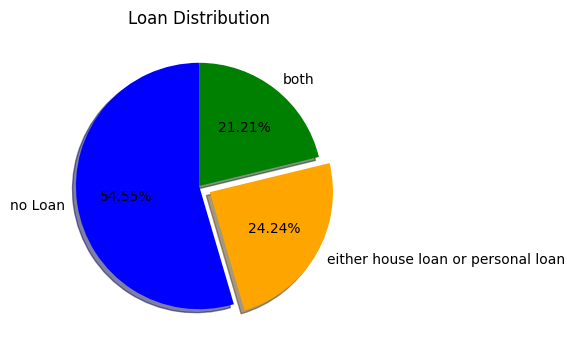

In [17]:
x= data['Loans'].value_counts()
labels = ['no Loan','either house loan or personal loan','both']
color =['blue','orange','green']
explode=[0,0.1,0]
plt.figure(figsize =(4,4))
plt.pie(x, labels=labels, colors= color, explode=explode, startangle=90, shadow=True, autopct='%.2f%%')
plt.title("Loan Distribution")
plt.show()

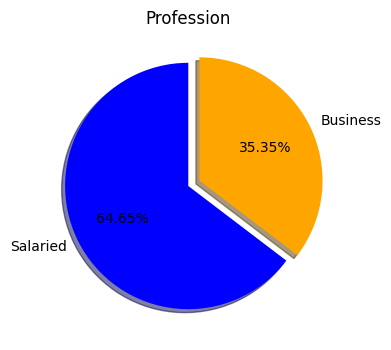

In [18]:
x=data['Profession'].value_counts()
labels = ['Salaried','Business']
color =['blue','orange']
explode=[0,0.1,]
plt.figure(figsize =(4,4))
plt.pie(x, labels=labels, colors= color, explode=explode, startangle=90, shadow=True, autopct='%.2f%%')
plt.title("Profession")
plt.show() 

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5032\1910503724.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Age', palette='tab10')


<Axes: xlabel='Age', ylabel='count'>

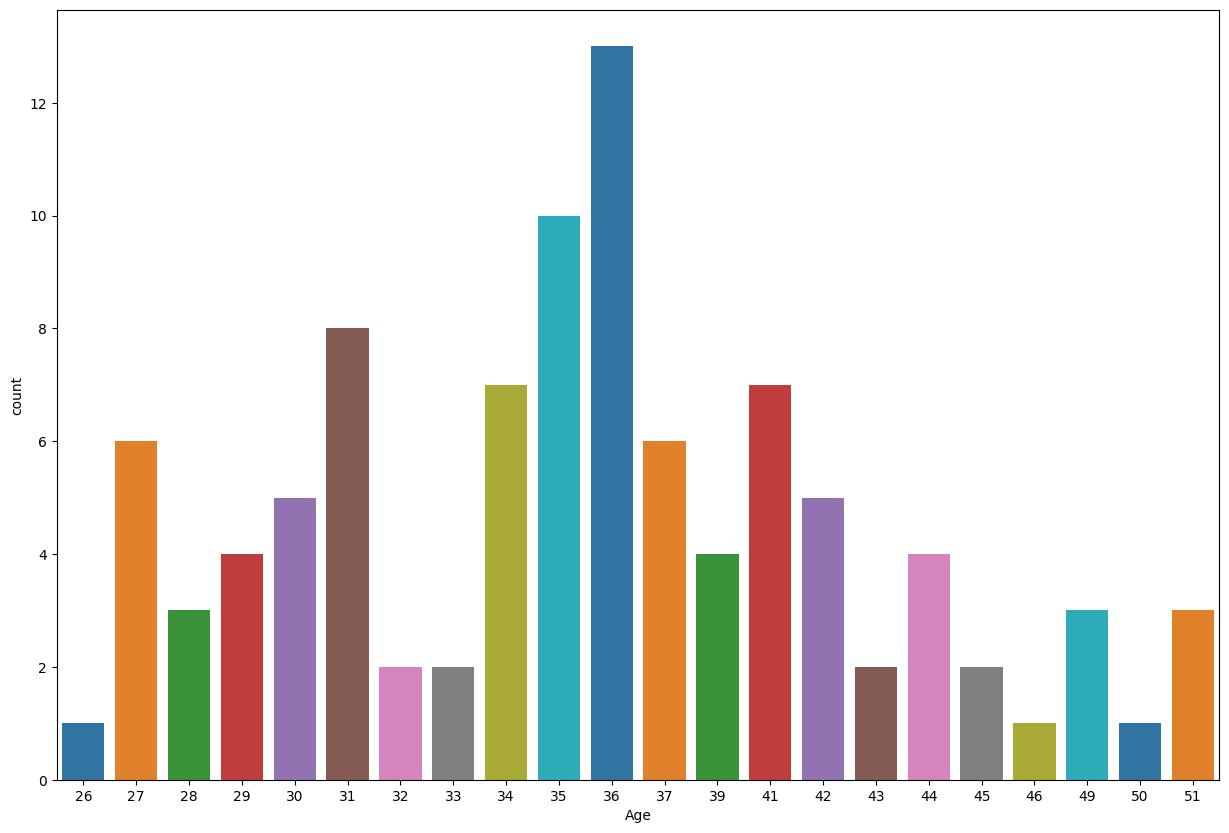

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(data=data, x='Age', palette='tab10')

From above graph we can see Age 36 mostly buy vehicle. 

# 🎯 Behavioral & Psychographic Analysis
Using violin plots, we explored how features like age, salary, and dependents etc. relate to the type of vehicle consumers purchase.
These insights reveal patterns in buying behavior and lifestyle choices 🚘🧠

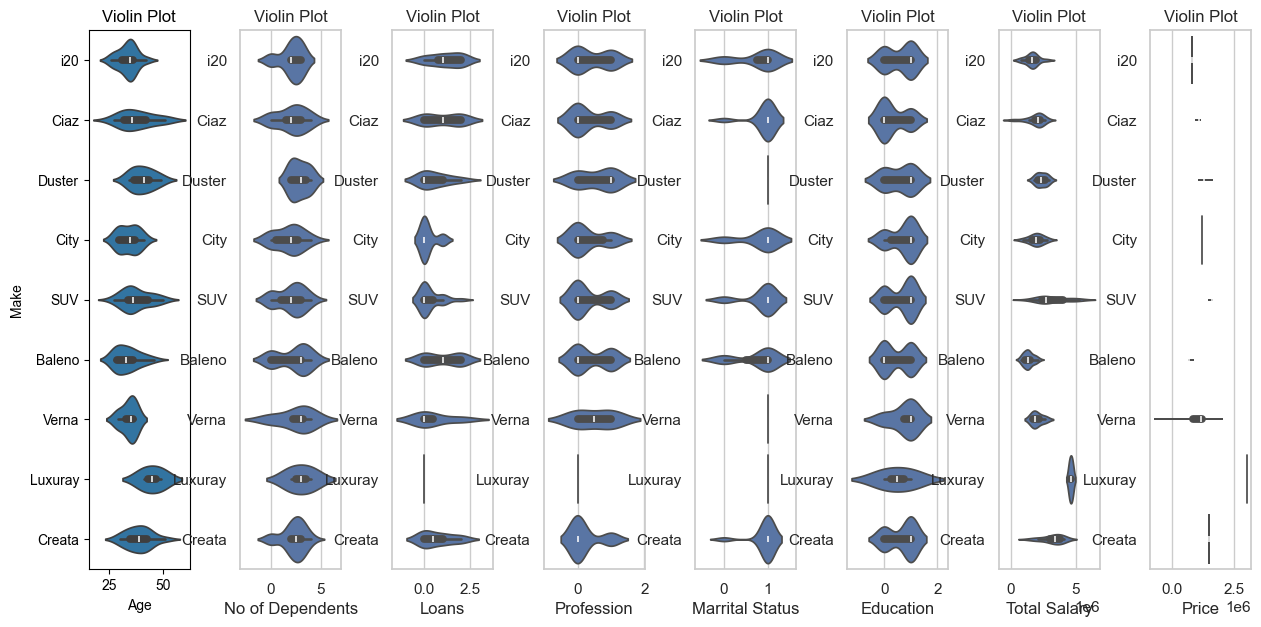

In [20]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Age','No of Dependents','Loans', 'Profession','Marrital Status','Education','Total Salary','Price']:
    n+=1
    plt.subplot(1,8,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Make',data=data)
    plt.ylabel("Make" if n==1 else '')
    plt.title('Violin Plot')

* > 🎻📊 Violin Plot Observations:
1. Age : Younger Consumer Purchase less Expensive Vehicles
2. Number of Dependents: greater the number Of Dependemts Makes the consumer buy avehicle with more seats.
3. Salary: If you overlap the normalised salary plots with price plot, you would observe the median of salary violin plot matches that of the price of the vehicle indicating a very direct relationship.

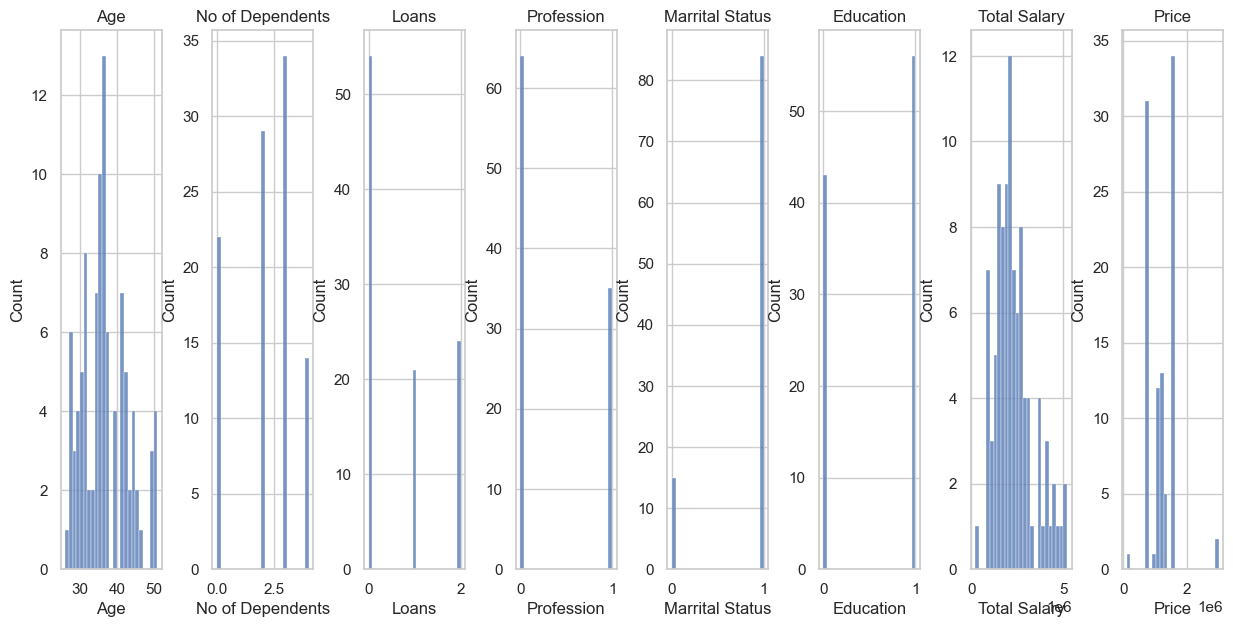

In [21]:
# Plotting the fequency of each entry for consumer features - Age, No. 0f Dependents, Total Salary, EV_Price
plt.figure(1, figsize=(15,7))
n=0

for x in ['Age', 'No of Dependents' ,'Loans', 'Profession','Marrital Status','Education','Total Salary' ,'Price']:
  n += 1
  plt.subplot(1,8,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.histplot(data[x], bins= 25)
  plt.title(f'{x}')
plt.show()

### 💸 Salary vs. Vehicle Purchase Behaviour
We examined how total salary influences vehicle make and price.
Turns out, higher salaries often correspond to more expensive cars—makes sense, right? 💼➡️🚗

>> make vehicles they tend to purchase

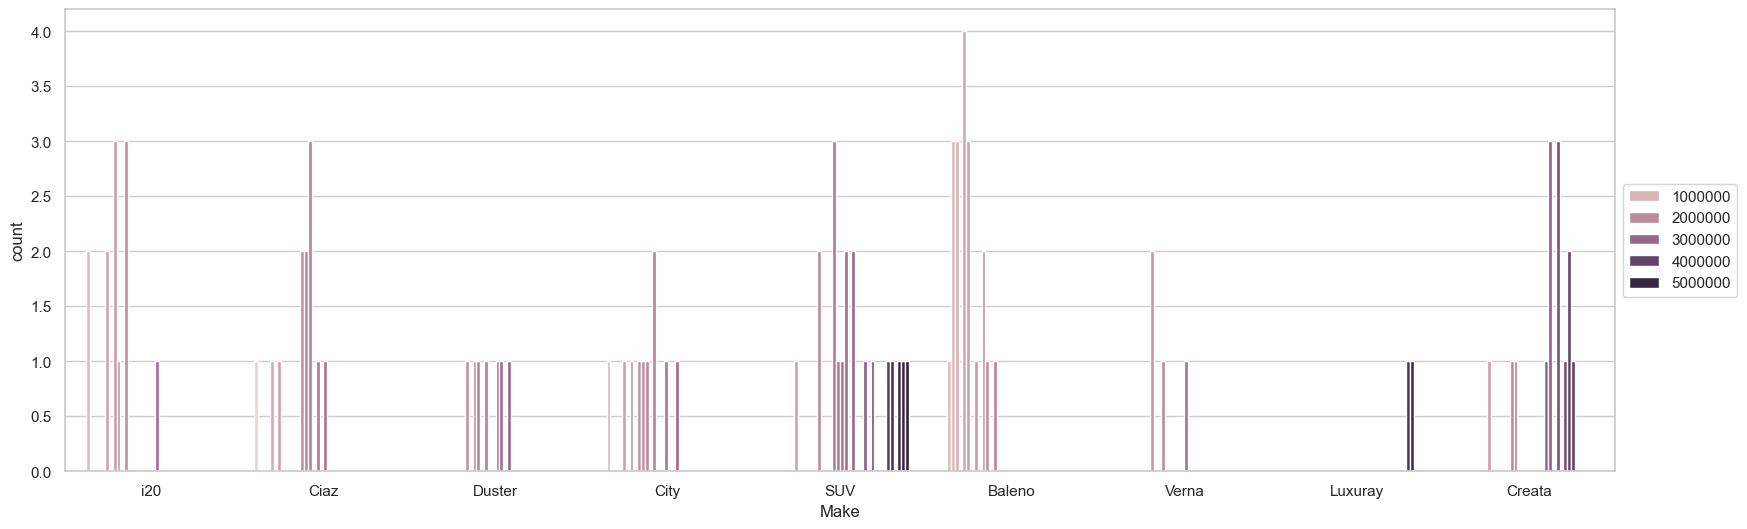

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make",data=data,hue="Total Salary")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

>> Price of vehicle owned

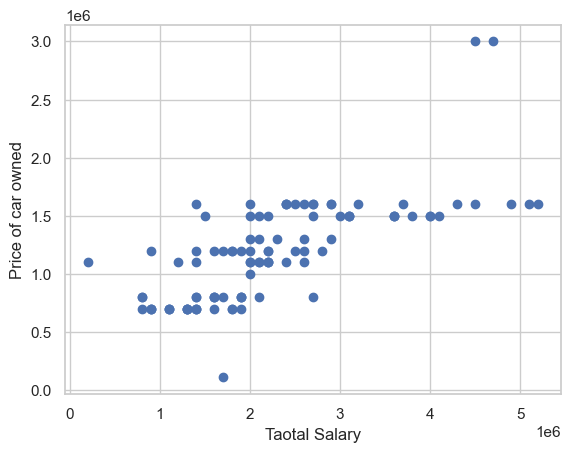

In [23]:
plt.xlabel('Taotal Salary')
plt.ylabel('Price of car owned')
plt.scatter(data['Total Salary'],data['Price'])

* > 💰📈 Relationship Between Total Salary and Car Price

This scatter plot explores how a customer’s total salary influences the price of the car they own.

🔍 Key Observations:

🔄 There's a positive correlation — higher salary individuals generally own more expensive cars.

💡 However, the relationship appears non-linear beyond a certain point (~1.5M), as many car prices plateau around 1.5M despite rising salaries.

⚠️ A few outliers are visible — people with mid-range salaries (~2M) owning relatively cheaper cars, and vice versa.

🚗 Most owned cars cluster between 1M and 1.5M, suggesting this is the sweet spot for affordability across income groups.

✅ Insight: While salary impacts car choice, other factors like savings, loans, lifestyle, or financial goals likely moderate the final decision. 💳🚘

### 💳 Consumer Loan Status vs Vehicle Preference

> 🚗 Vehicle Purchase Trend by Loan Status(Personal loans + house loans)

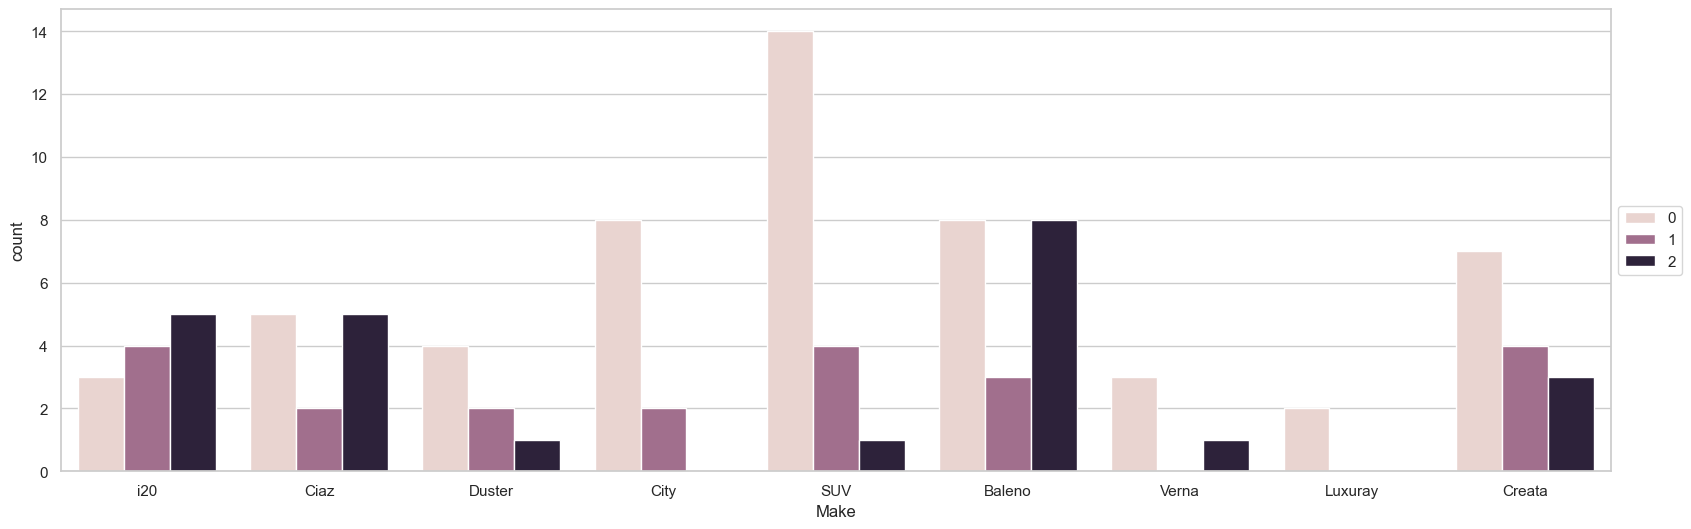

In [24]:
plt.figure(figsize=(20,6))
sns.countplot(x="Make", data=data, hue ="Loans")
plt.legend(loc='center left', bbox_to_anchor= (1,0.5))

(0 = No Loans, 1 = Either Home or Personal Loan, 2 = Both Loans)

This bar chart highlights the distribution of car models purchased based on customers' loan status. It's an insightful way to understand how financial obligations shape vehicle preferences.

🔍 Key Observations:

🛻 SUVs are overwhelmingly favored by individuals with no loans (Cluster 0) — suggesting that financially unburdened buyers may aim for larger, more expensive vehicles.

🚘 City, Baleno, and Creta are also common choices for Cluster 0, showing a general tendency for wider vehicle variety among those without loans.

💸 People in Cluster 1 (with either a home or personal loan) show moderate interest in i20, Creta, and Baleno, possibly opting for more economical or fuel-efficient models due to loan constraints.

🏦 Consumers in Cluster 2 (those juggling both types of loans) mostly go for i20, Ciaz, and Baleno, which are relatively budget-friendly and practical options — reflecting a more cautious or necessity-driven buying approach.

💼 Luxury models and Verna remain the least chosen across all loan categories — likely due to affordability and priority shifts.

✅ Insight: As financial burden increases (from Cluster 0 to 2), people tend to move from high-end and spacious vehicles (like SUVs) toward compact, practical cars.

> price of vehicle owned (based on loans(personal loan+ home loans))

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5032\3201091077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loans', y='Price', data=data, palette="Spectral")


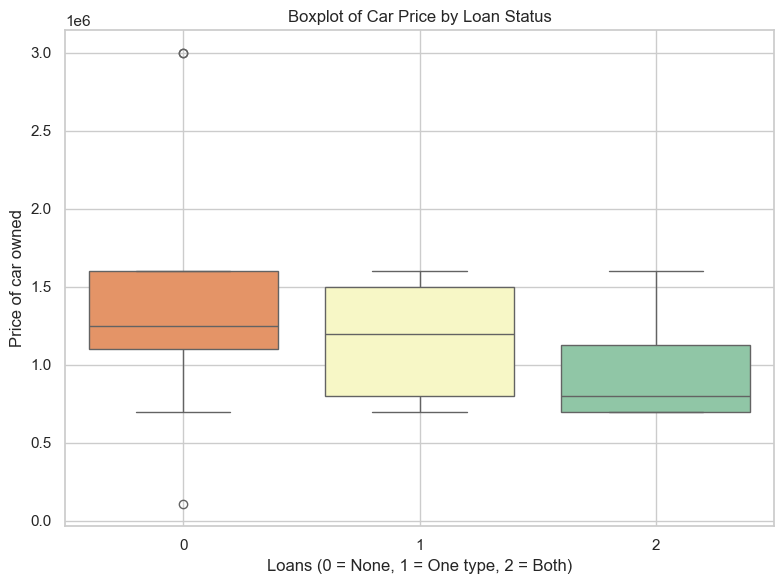

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Loans', y='Price', data=data, palette="Spectral")

plt.title("Boxplot of Car Price by Loan Status")
plt.xlabel("Loans (0 = None, 1 = One type, 2 = Both)")
plt.ylabel("Price of car owned")
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

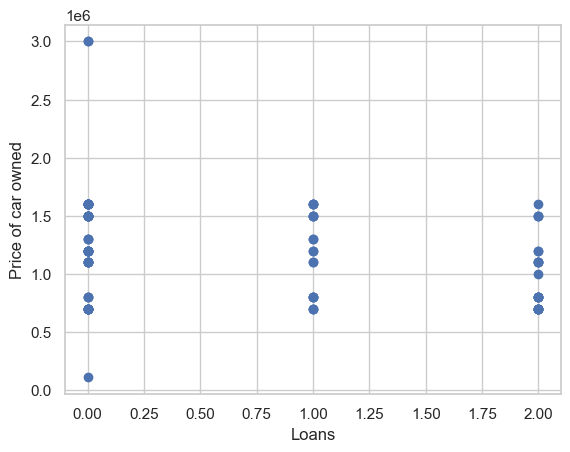

In [26]:
plt.xlabel('Loans')
plt.ylabel('Price of car owned')
plt.scatter(data['Loans'], data['Price'])

> 🔍 Interpretation (Quick Summary):

🟢 No Loans (0)
💸 Car prices range from very low to very high — includes both budget buyers and wealthy spenders.

🟠 One Loan (1)
🚗 Mostly mid-range cars - generally own cars in the moderate price range — likely being careful with spending due to financial commitments.

🔴 Both Loans (2)
🚘 Also in the mid-range zone — similar to group 1, but with slightly lower median, possibly due to higher financial burden.

>🧬 Demographic Analysis

Distributions and pair plots helped us explore relationships and correlations among all major features.
Perfect for spotting trends and potential predictors in vehicle preferences 👥📉

C:\Users\Joyi\AppData\Local\Temp\ipykernel_5032\1956269267.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],bins =20)
C:\Users\Joyi\AppData\Local\Temp\ipykernel_5032\1956269267.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x],bins =20)
C:\Users\Joyi\AppData\Local\Temp\ipyke

<function matplotlib.pyplot.show(close=None, block=None)>

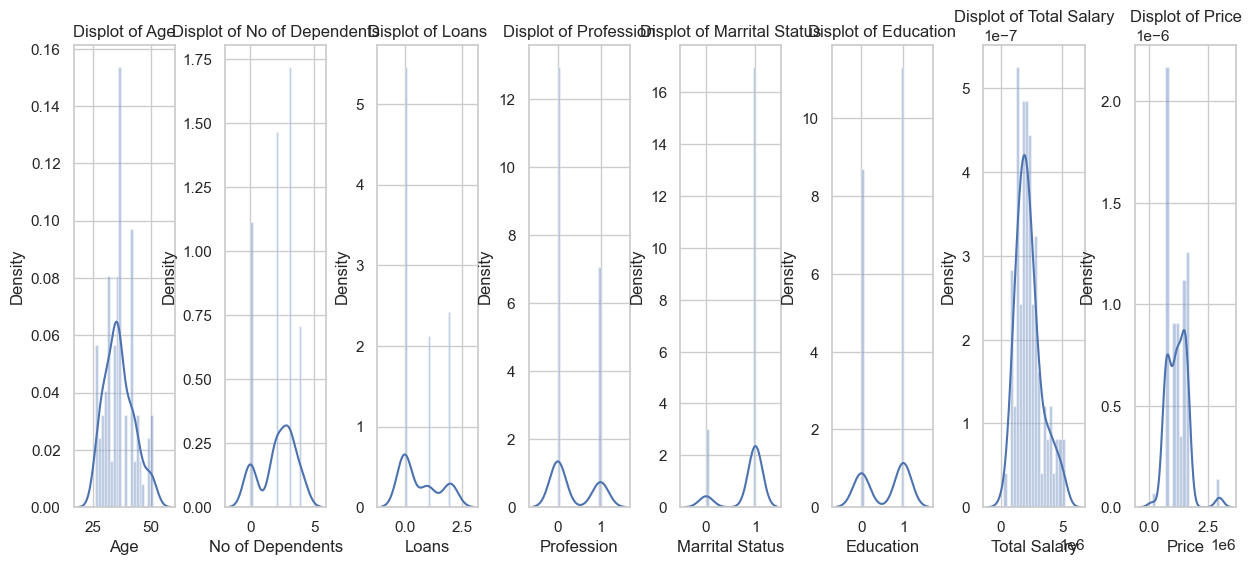

In [27]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'No of Dependents' ,'Loans', 'Profession','Marrital Status','Education','Total Salary' ,'Price']:
    n += 1
    plt.subplot(1,8,n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(data[x],bins =20)
    plt.title('Displot of {}'.format(x))
plt.show

> 🔍 Interpretation (Quick Summary):

📊 This set of displots provides insights into the distribution patterns of key variables relevant to EV market segmentation.

🔍 Key Observations:

👥 Age is slightly right-skewed, with most consumers between 25 and 40 years old — a prime target age group.

👶 Number of Dependents shows a bimodal distribution, indicating distinct family-size segments.

💸 Loans, both personal and house, are sparse — suggesting a majority of users have no or limited active loans.

💼 Profession, 🧑‍🎓 Education, and 💍 Marital Status are binary-coded and show class imbalance — useful for group profiling.

💵 Total Salary is right-skewed, meaning a few consumers have significantly higher income.

🚗 Price also shows a skew toward lower values, indicating most customers are likely to prefer budget to mid-range EVs.

✅ These distributions help in understanding consumer profiles and refining clustering or marketing strategies.

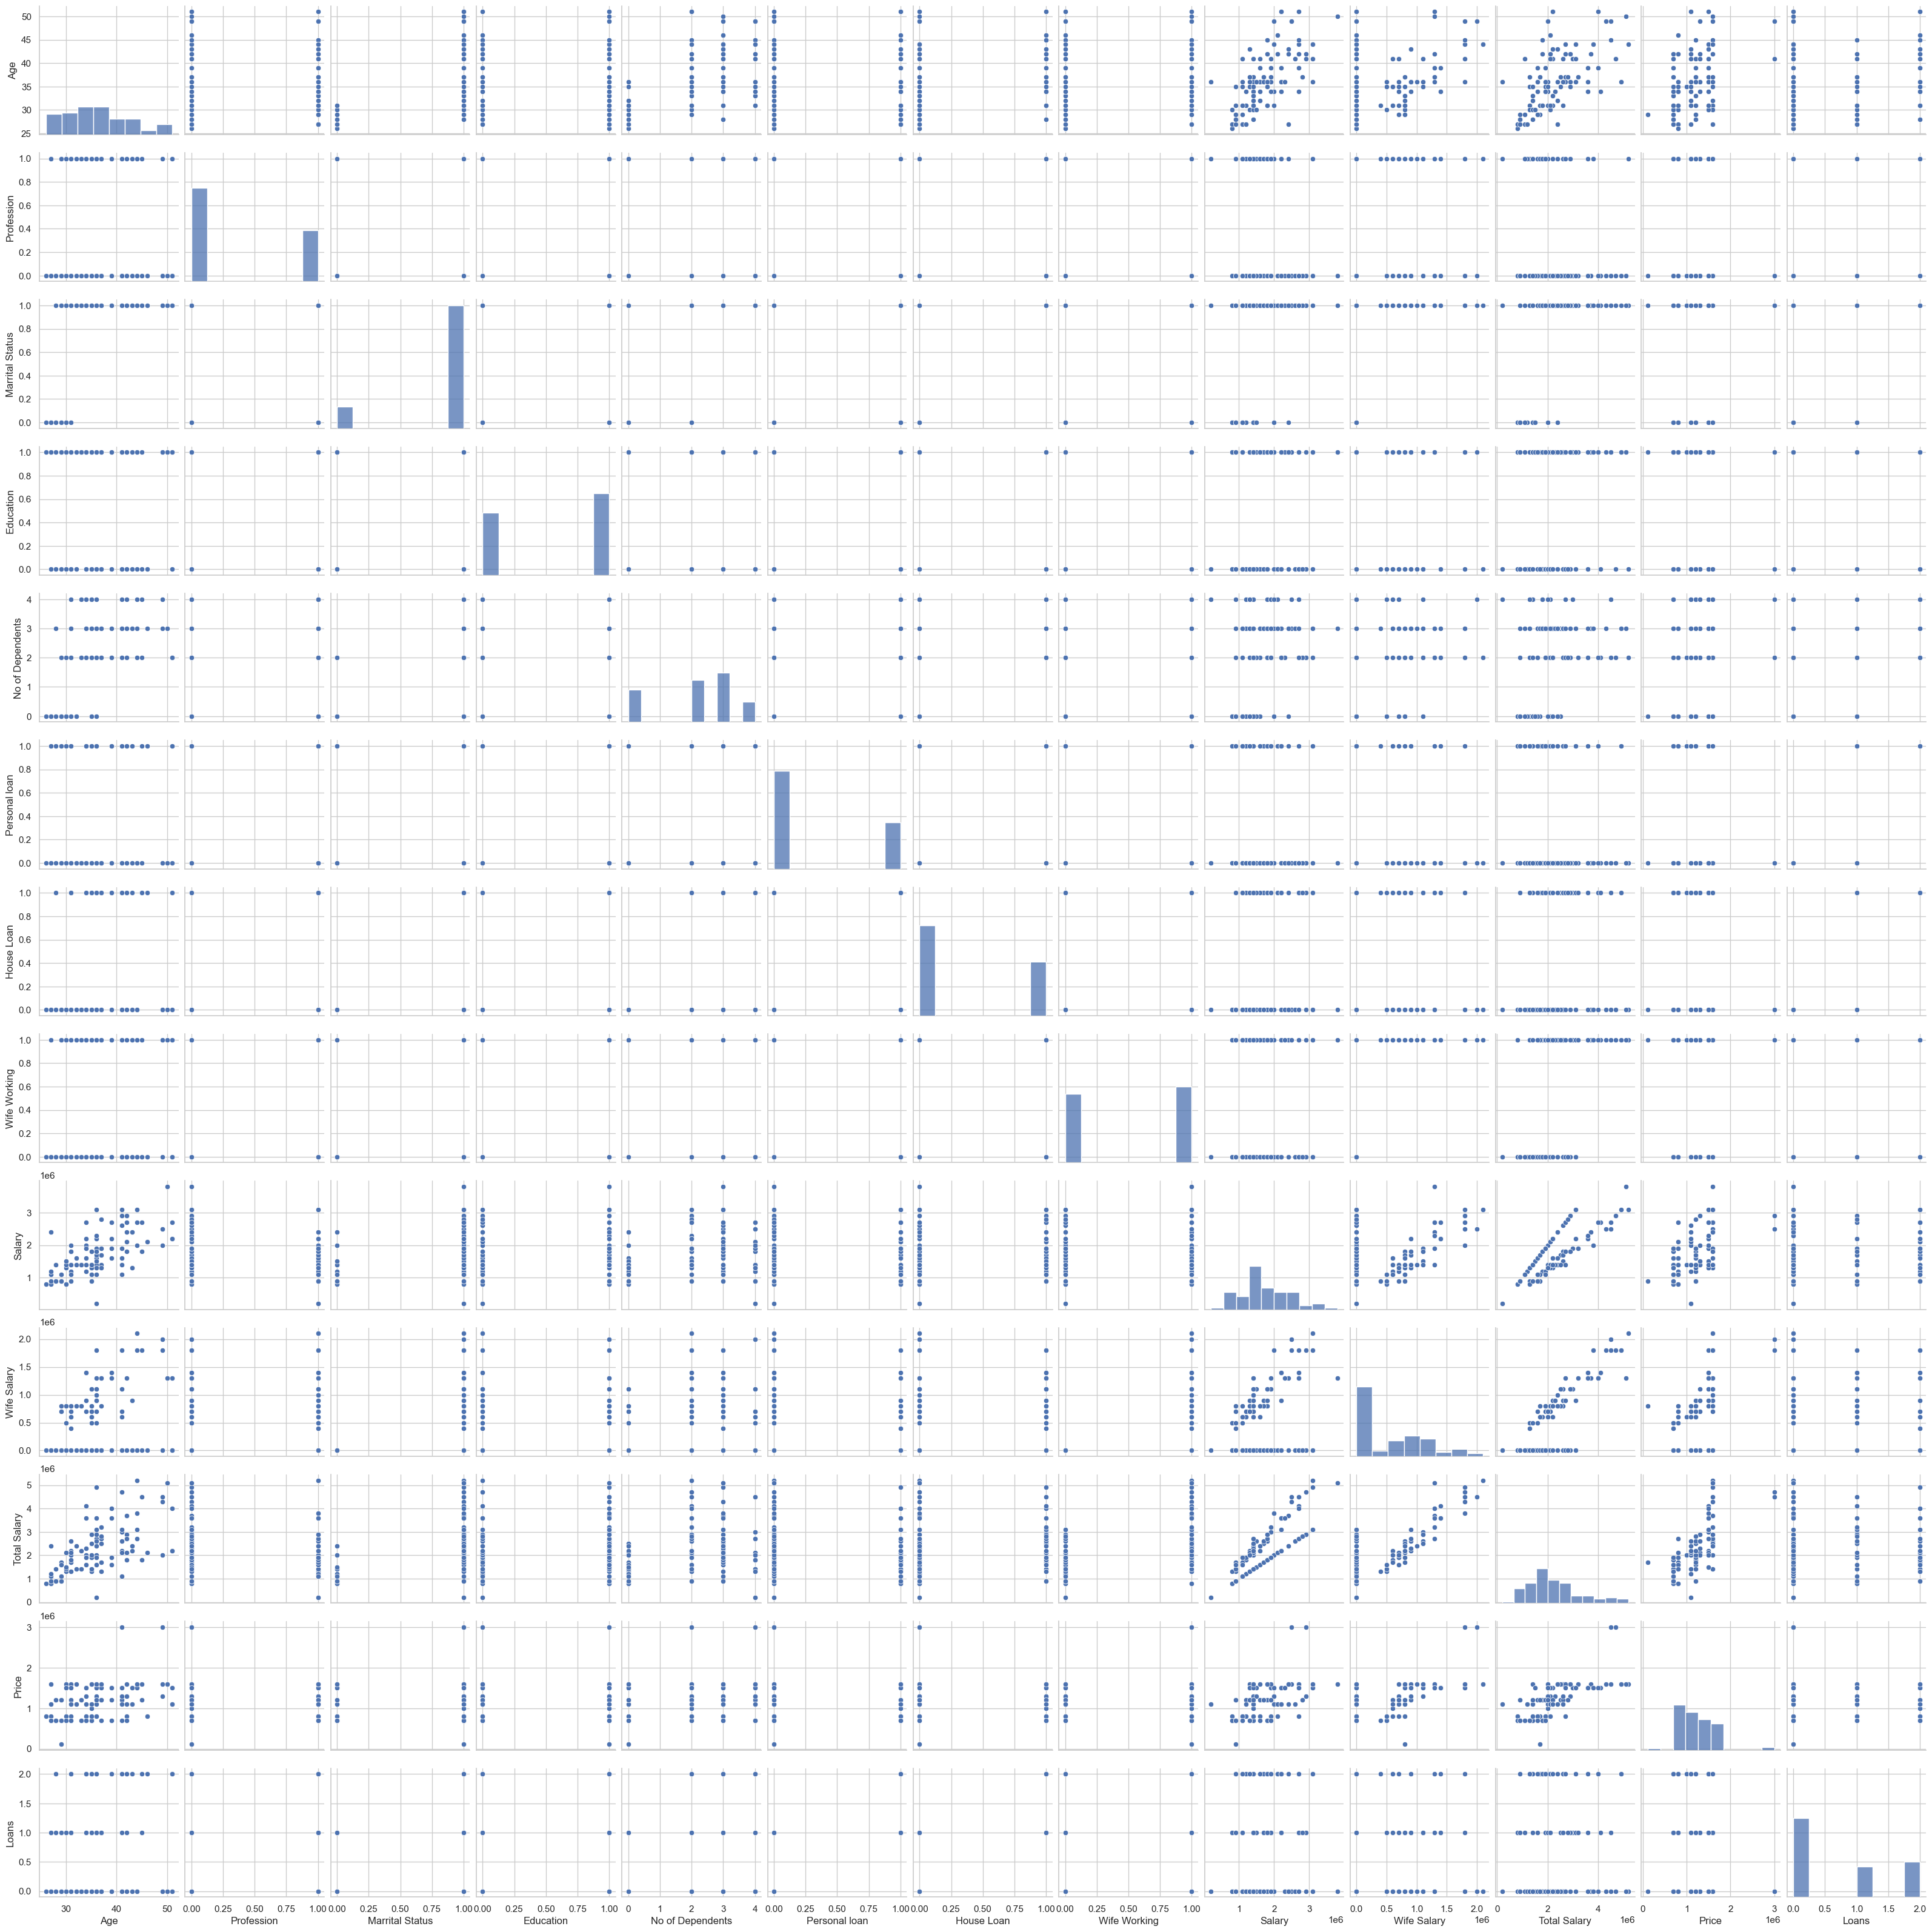

In [28]:
sns.pairplot(data)

In [29]:
df = data.iloc[:, data.columns!='Make']
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Loans
0,27,0,0,1,0,1,0,0,800000,0,800000,800000,1
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000,2
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000,2
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000,0
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000,1


<Axes: >

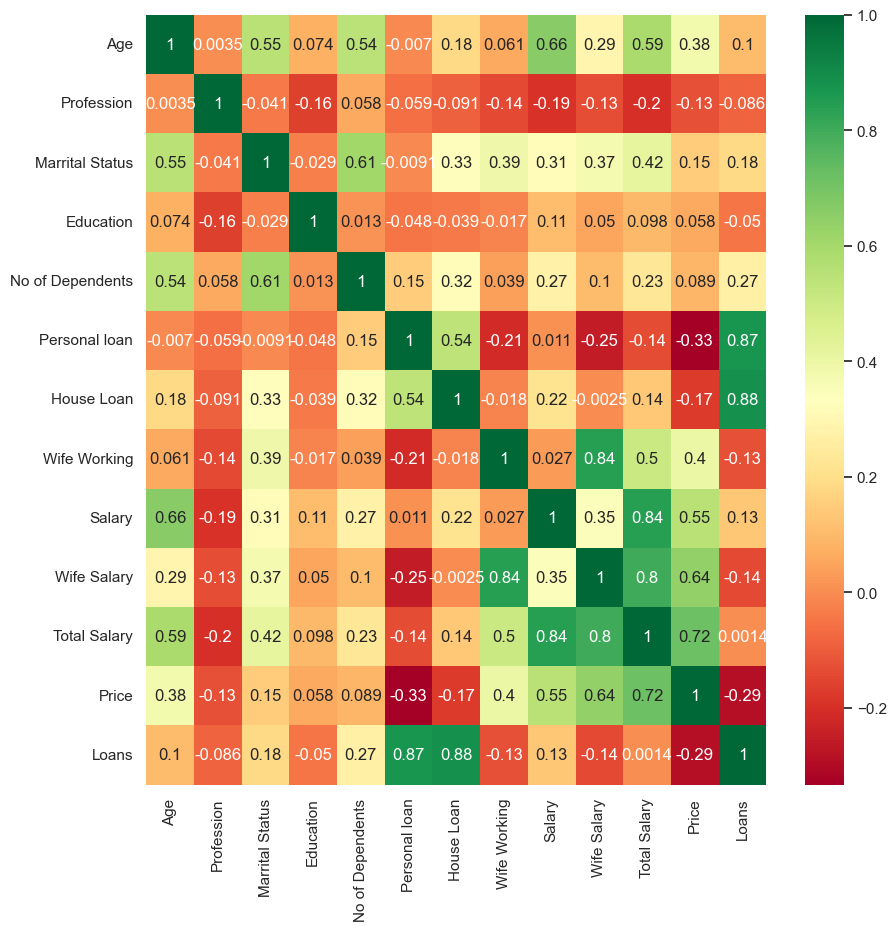

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

* 🔍 Heatmap Insights (Correlation Matrix) 
 
🧠 The heatmap above shows the correlation between different features related to EV market segmentation. Key observations:

💰 Salary, Wife Salary, and Total Salary are strongly correlated — indicating household income patterns.

🏦 Personal Loan and House Loan show a high correlation with the number of dependents and each other — suggesting financial behavior trends.

📈 Price is positively correlated with salary-related features, which helps in identifying target customer segments based on income.

👨‍👩‍👧‍👦 Marital status, education, and profession have weak correlations, suggesting they may be less impactful on purchasing or loan behavior.

✅ These correlations help us focus on the most relevant features for clustering and segmentation.

# 🌏 Geographic Analysis

🔍 Objective:

Identify the most suitable regions in India to develop an early market for electric vehicles (EVs) 

In [31]:
# importing statewise sales dataset

place_data = pd.read_csv("C:\\Users\\Joyi\\OneDrive\\Desktop\\feynn lab internship\\ev market\\EVStats.csv")
place_data

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


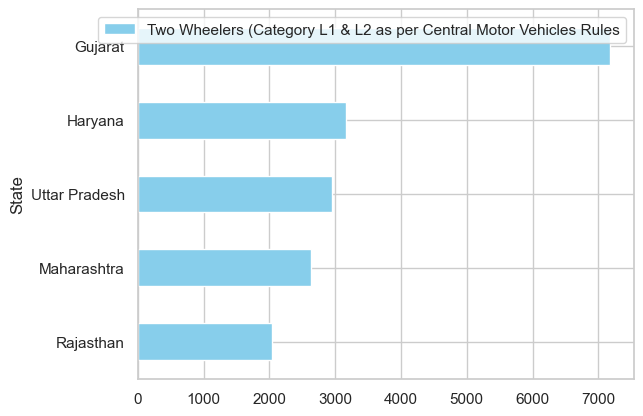

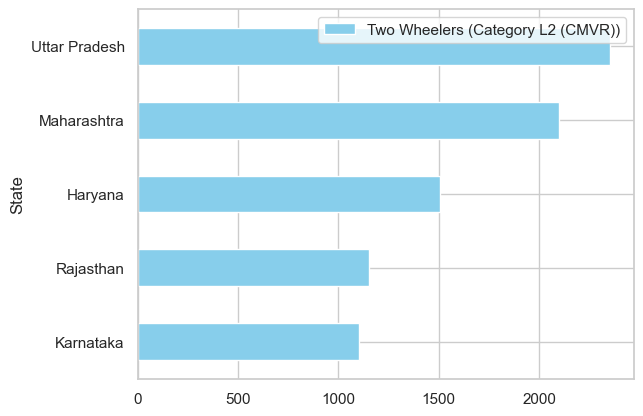

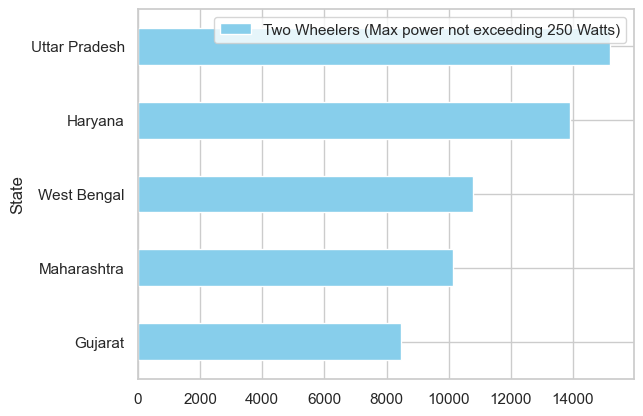

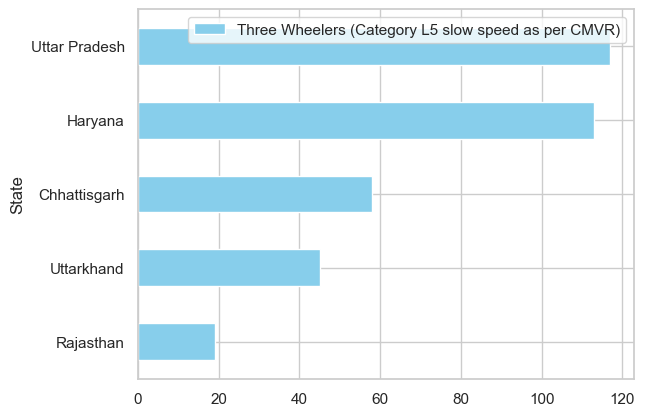

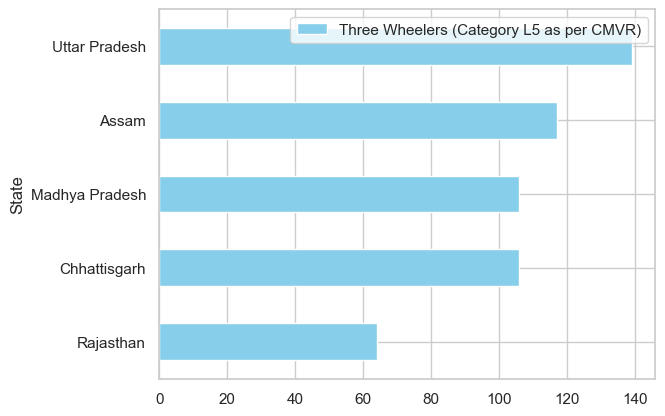

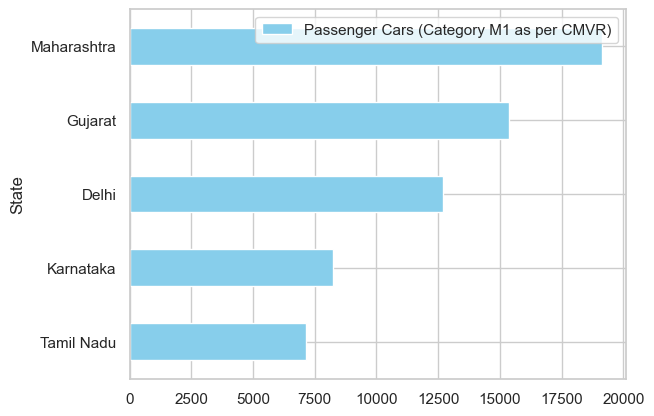

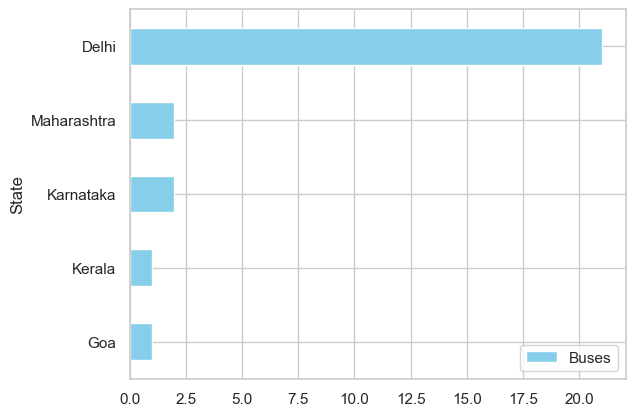

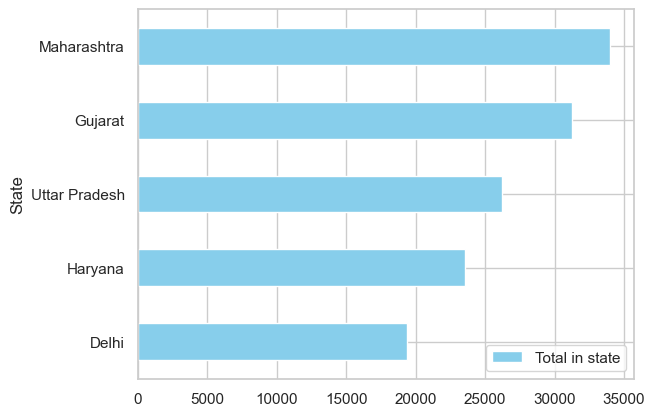

In [32]:
# top 5 

for y in ['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules','Two Wheelers (Category L2 (CMVR))','Two Wheelers (Max power not exceeding 250 Watts)','Three Wheelers (Category L5 slow speed as per CMVR)','Three Wheelers (Category L5 as per CMVR)','Passenger Cars (Category M1 as per CMVR)','Buses','Total in state']:
    ax = place_data.sort_values(y, ascending = True).tail(5).plot.barh(x='State',y=y, color= 'skyblue')

>### 🔍 Interpretation (Quick Summary):

🛵 Two Wheelers (Category L1 & L2): Haryana leads 🚀, followed by Uttar Pradesh and Maharashtra.

🛵 Two Wheelers (Category L2 only): Maharashtra tops 🥇, with Haryana and Rajasthan close behind.

🔋 Low Power Two Wheelers (Max 250 Watts): Massive numbers in Uttar Pradesh and Haryana 📈.

🚗 Three Wheelers (Slow speed): Uttar Pradesh and Haryana are major hubs 🛺.

🚗 Three Wheelers (Category L5): Assam and Madhya Pradesh show strong presence 💪.

🚘 Passenger Cars: Maharashtra is a clear leader 🥇, followed by Gujarat and Delhi.

🚌 Buses: Delhi dominates 🚍, Maharashtra slightly behind.

🛻 Goods Vehicles (likely Category N): Maharashtra and Gujarat lead in goods transport 🚚.

> ##### 🚗⚡ Insight: Based on the type of electric vehicle, states with a higher concentration of EV registrations emerge as prime targets. These regions likely consist of early adopters and innovators who are more open to purchasing new technologies.
> ##### 🎯 Strategy: Focus marketing and expansion efforts in these high-potential states to accelerate early market penetration and build momentum for broader adoption.

# 🚀 Model Deployment

### 🤖 K-Means Clustering Setup

We’re diving into K-Means Clustering, one of the most widely used unsupervised learning techniques for identifying hidden patterns in data.

📦 First up: scaling the data to ensure fair comparisons across features.

🔍 Then, we'll group similar consumer profiles into meaningful clusters  ⚡🚗📊.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [34]:
features = df[['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary','Total Salary','Price']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features,columns=['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents', 'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary','Total Salary','Price'])

x=scaled_features.to_numpy()
scaled_features

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,-1.498630,-0.739510,-2.366432,0.876275,-1.642313,1.446980,-0.772512,-1.051847,-1.397118,-0.887055,-1.406760,-0.904843
1,-0.211304,-0.739510,0.422577,0.876275,-0.136859,1.446980,1.294479,0.950708,-0.501877,0.108995,-0.258937,-0.445579
2,1.397855,1.352247,0.422577,-1.141195,1.368594,1.446980,1.294479,-1.051847,0.094950,-0.887055,-0.450240,0.013685
3,0.754191,1.352247,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,-0.203464,0.108995,-0.067633,0.013685
4,-0.854967,-0.739510,0.422577,0.876275,-0.136859,1.446980,-0.772512,0.950708,0.094950,0.441012,0.314975,0.932213
...,...,...,...,...,...,...,...,...,...,...,...,...
94,-1.498630,1.352247,-2.366432,-1.141195,-1.642313,-0.691095,-0.772512,-1.051847,0.990190,-0.887055,0.123671,0.932213
95,2.202434,-0.739510,0.422577,0.876275,0.615867,-0.691095,-0.772512,0.950708,3.079085,1.271054,2.706274,0.932213
96,2.363350,1.352247,0.422577,-1.141195,-0.136859,1.446980,1.294479,-1.051847,0.691777,-0.887055,-0.067633,-0.215947
97,2.363350,-0.739510,0.422577,0.876275,-0.136859,-0.691095,-0.772512,0.950708,1.437811,1.271054,1.654102,0.702581


In [35]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


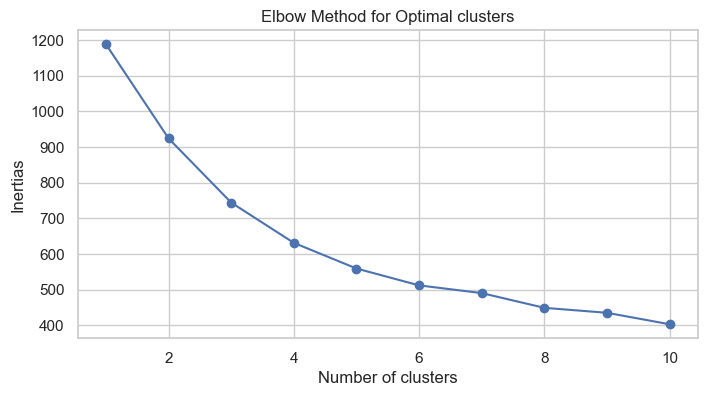

In [36]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), inertia, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.title('Elbow Method for Optimal clusters')
plt.grid(True)
plt.show()

> 🔍 Interpretation (Quick Summary):

📊 Elbow Method for Optimal Clusters
The plot above shows the inertia (within-cluster sum of squares) for different numbers of clusters. The "elbow" appears around 3 to 4 clusters, suggesting this as the optimal range for segmenting the EV market based on income levels🚗💰.

In [37]:
 # using n_clusters =3    update based on Elbow method

kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
y1= kmeans.fit_predict(scaled_features)
y1_df = pd.DataFrame(y1,columns=['Cluster'])
final_data1 = pd.concat([df,y1_df],axis=1) 
final_data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Loans,Cluster
0,27,0,0,1,0,1,0,0,800000,0,800000,800000,1,2
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000,2,0
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000,2,0
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000,0,1
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,1,0,0,0,0,0,0,2400000,0,2400000,1600000,0,2
95,50,0,1,1,3,0,0,1,3800000,1300000,5100000,1600000,0,1
96,51,1,1,0,2,1,1,0,2200000,0,2200000,1100000,2,0
97,51,0,1,1,2,0,0,1,2700000,1300000,4000000,1500000,0,1


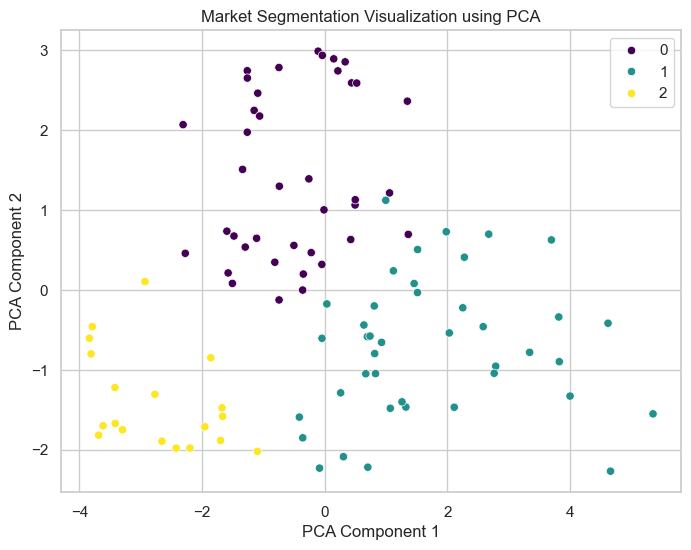

In [38]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize= (8,6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=y1, palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Market Segmentation Visualization using PCA')
plt.grid(True)
plt.show()

> 🧠 **PCA Market Segmentation Interpretation**

🎯 Clear Clustering:

The PCA plot shows three well-separated clusters (Cluster 0, 1, 2).

This indicates that your income-based features are effectively segmenting customers into distinct market groups.

💰 Income-Based Differences:

Since PCA was applied on income-related data (Salary, Wife Salary, Total Salary, etc.), the clusters likely represent different income levels or spending capacities.

Example:

Cluster 2 (💛 Yellow) may represent low-income buyers.

Cluster 0 (🟣 Purple) appears as a moderate-income group.

Cluster 1 (🟢 Teal) might indicate high-income consumers with greater EV purchasing power.

🔄 Low Overlap, High Separability:

The clusters are not overlapping much, meaning the model is doing a good job at distinguishing customer groups based on income.

🚘 Strategic Insights:

We could use this segmentation to target each group differently:

💛 Cluster 2: Offer affordable EVs, subsidies, or financing options.

🟣 Cluster 0: Mid-range EVs with value-for-money features.

🟢 Cluster 1: Premium EVs, luxury features, or performance-based models.

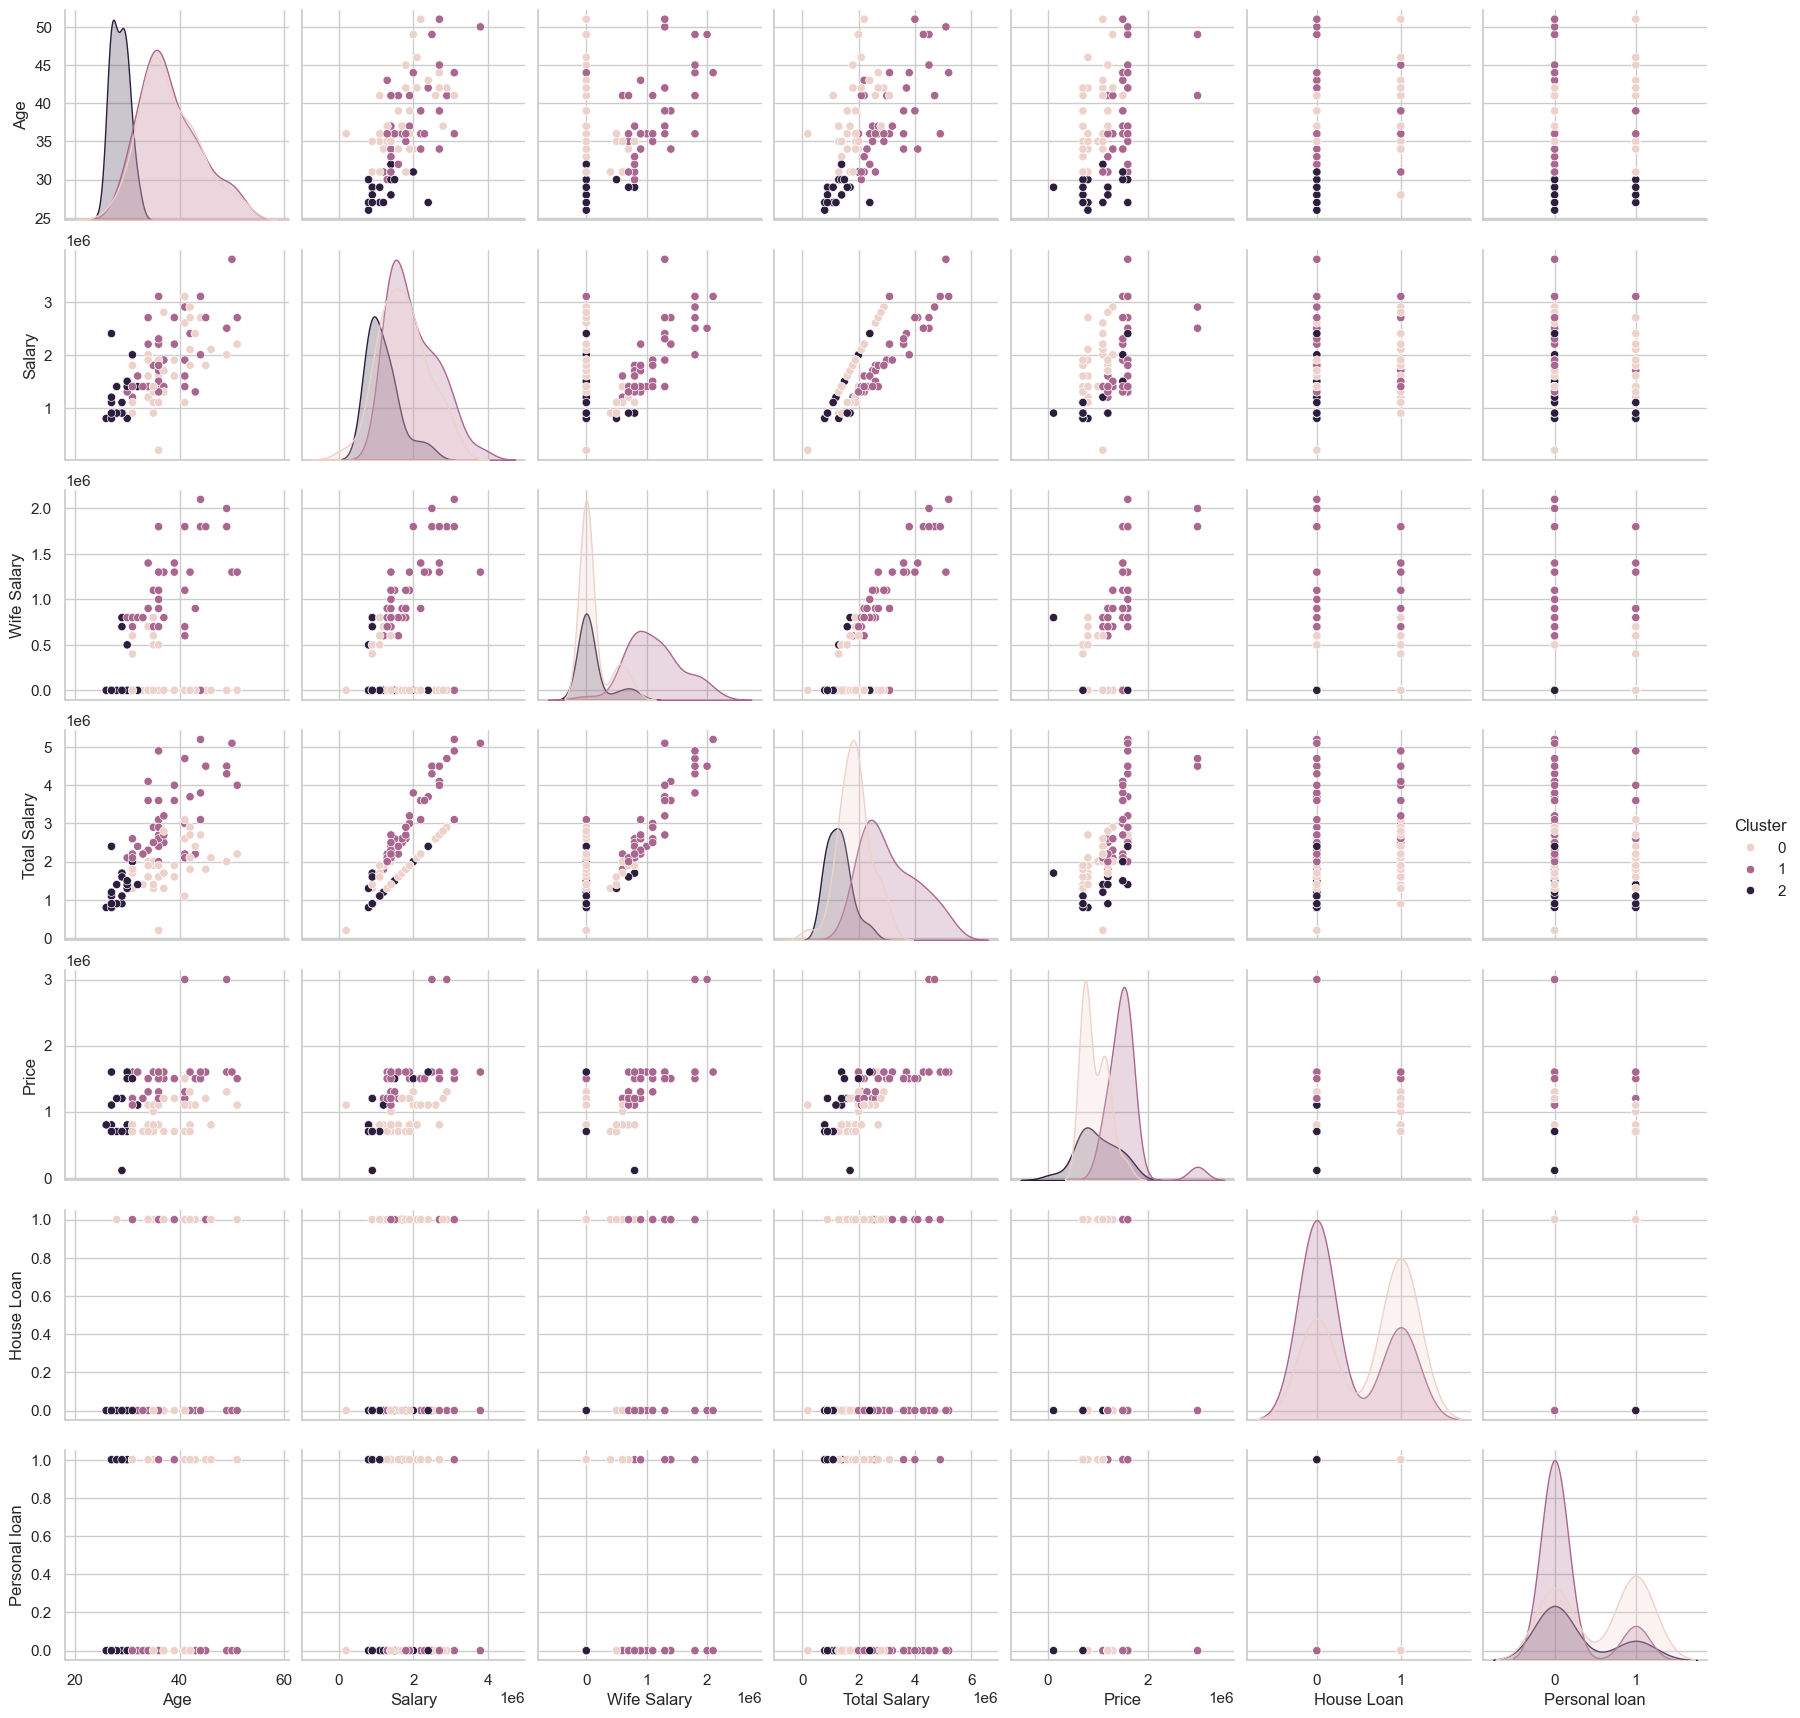

In [39]:
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price','House Loan','Personal loan'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price','House Loan','Personal loan'], hue='Cluster')

In [40]:
cluster_summary = final_data1.groupby('Cluster').mean()
cluster_summary

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Loans
Cluster,,,,,,,,,,,,,
0,38.153846,0.435897,1.000000,0.512821,2.974359,0.538462,0.615385,0.205128,1.730769e+06,1.205128e+05,1.851282e+06,9.410256e+05,1.153846
1,38.146341,0.243902,1.000000,0.585366,2.341463,0.146341,0.317073,0.975610,1.995122e+06,1.126829e+06,3.121951e+06,1.531707e+06,0.463415
2,28.578947,0.421053,0.210526,0.631579,0.210526,0.263158,0.000000,0.210526,1.189474e+06,1.052632e+05,1.294737e+06,9.847368e+05,0.263158


In [41]:

kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
y1= kmeans1.fit_predict(scaled_features)
y1_df = pd.DataFrame(y1,columns=['Cluster'])
final_data1 = pd.concat([df,y1_df],axis=1) 
final_data1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,Loans,Cluster
0,27,0,0,1,0,1,0,0,800000,0,800000,800000,1,1
1,35,0,1,1,2,1,1,1,1400000,600000,2000000,1000000,2,4
2,45,1,1,0,4,1,1,0,1800000,0,1800000,1200000,2,4
3,41,1,1,1,3,0,0,1,1600000,600000,2200000,1200000,0,2
4,31,0,1,1,2,1,0,1,1800000,800000,2600000,1600000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,1,0,0,0,0,0,0,2400000,0,2400000,1600000,0,1
95,50,0,1,1,3,0,0,1,3800000,1300000,5100000,1600000,0,0
96,51,1,1,0,2,1,1,0,2200000,0,2200000,1100000,2,4
97,51,0,1,1,2,0,0,1,2700000,1300000,4000000,1500000,0,0


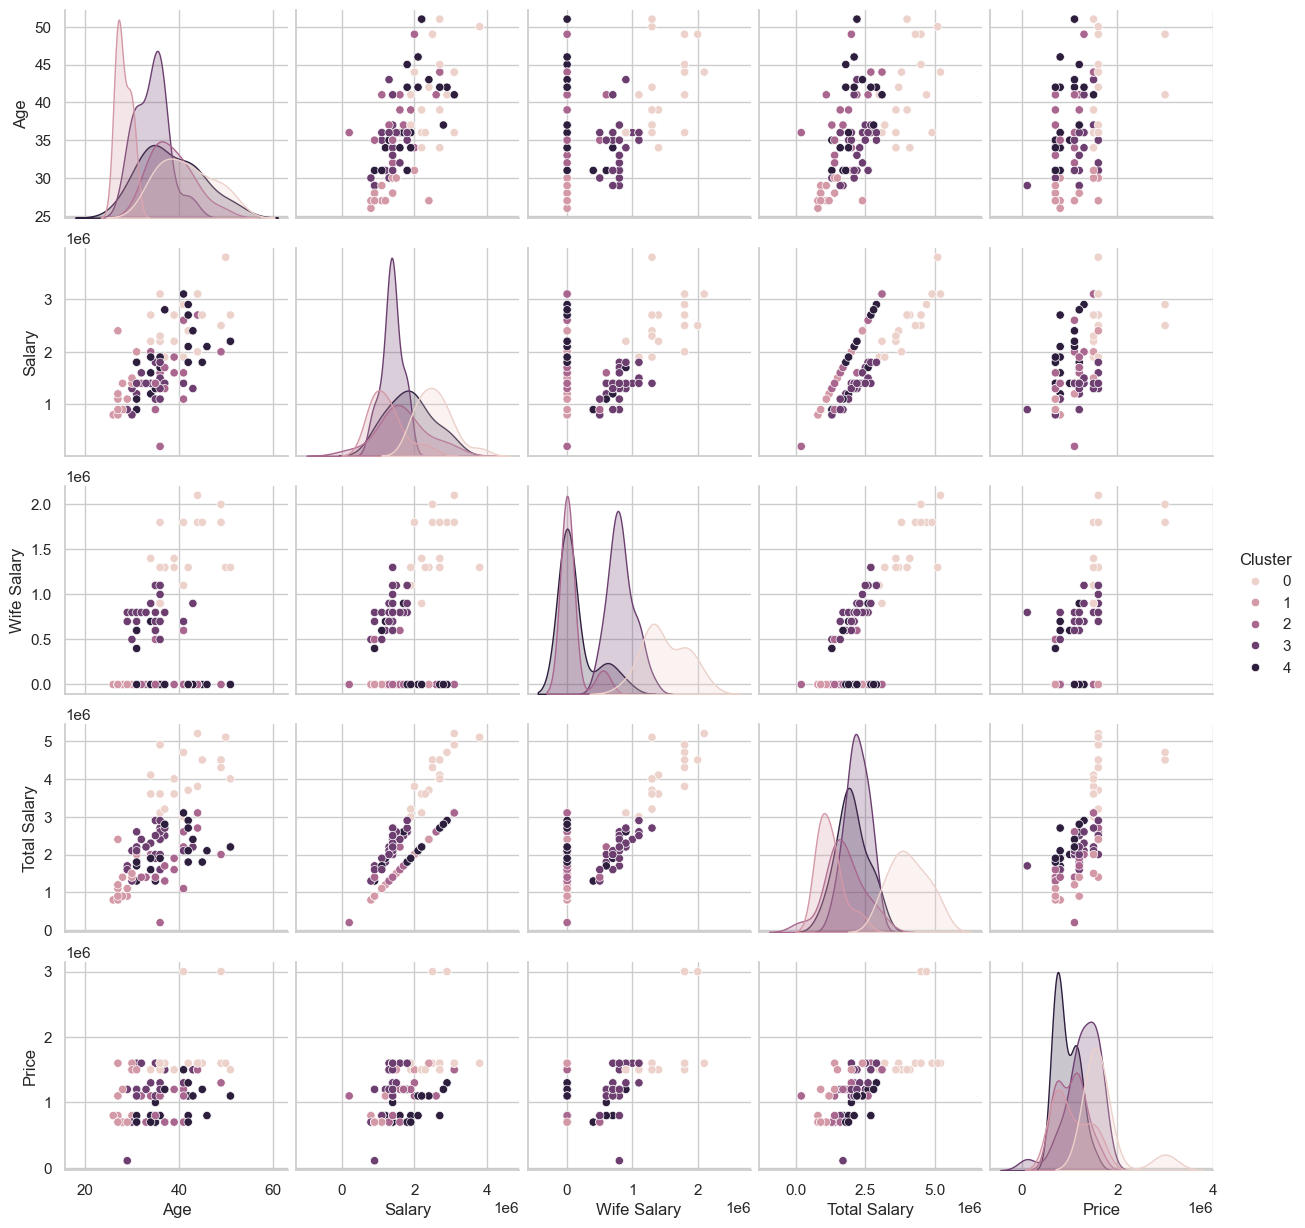

In [42]:
sns.pairplot(final_data1,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Cluster')

> 🔍📈 Pairplot Interpretation:

🔍 Cluster Patterns:
Here I have 5 clusters (0–4) showing distinct groupings.
Each cluster appears to reflect different income profiles and purchase behaviors.

💼 Salary vs Total Salary:

Strong positive linear relationship—expected, since Total Salary includes both individual and wife’s salary.

Some clusters (e.g., 0 & 4) have noticeably higher combined salaries, suggesting higher purchasing power.

👩‍👦 Wife Salary Insights:

Many individuals have 0 wife salary (bottom row in "Wife Salary"), but some clusters (esp. Cluster 2 or 4) show significant wife income, contributing to high Total Salary.

💸 Price vs Income:

EV price appears loosely correlated with Total Salary, which makes sense.

Cluster 4 (darkest) seems to represent high-income, high-price buyers—a premium segment.

👶 Age Trends:

Majority of buyers are between 30–40 years.

Cluster 0 seems to contain younger buyers, possibly early adopters with less income.

🔁 Cluster Distribution:

Cluster 1 and 3 appear more spread out, possibly representing a middle-income or transitional group.

Cluster 2 and 4 show more tight, focused clusters—indicating clear, defined consumer profiles.